In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
vaccinations = pd.read_csv('Vaccinations.csv')

In [3]:
vaccinations

,Date,Distributed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
558,2021-08-02,887071515
559,2021-08-03,888473145
560,2021-08-04,890482835
561,2021-08-05,893415845


In [4]:
cases = pd.read_csv('Cases.csv')
deaths = pd.read_csv('Deaths.csv')
cases

,State,Date,New Cases,7-Day Moving Avg,Historic Cases
0,United States,06/08/2021,124928,99727,8113
1,United States,05/08/2021,122058,96781,710
2,United States,04/08/2021,110066,92517,640
3,United States,03/08/2021,101364,89663,748
4,United States,02/08/2021,76388,86650,131
...,...,...,...,...,...
558,United States,26/01/2020,3,6,0
559,United States,25/01/2020,3,5,0
560,United States,24/01/2020,1,5,0
561,United States,23/01/2020,2,5,0


In [5]:
cases = cases.iloc[:, 1:3]
cases

,Date,New Cases
0,06/08/2021,124928
1,05/08/2021,122058
2,04/08/2021,110066
3,03/08/2021,101364
4,02/08/2021,76388
...,...,...
558,26/01/2020,3
559,25/01/2020,3
560,24/01/2020,1
561,23/01/2020,2


In [6]:
deaths

,State,Date,New Deaths,7-Day Moving Avg,Historic Deaths
0,United States,06/08/2021,630,454,3
1,United States,05/08/2021,698,424,2
2,United States,04/08/2021,500,377,0
3,United States,03/08/2021,592,355,10
4,United States,02/08/2021,333,327,13
...,...,...,...,...,...
558,United States,26/01/2020,0,0,0
559,United States,25/01/2020,0,0,0
560,United States,24/01/2020,0,0,0
561,United States,23/01/2020,0,0,0


In [7]:
deaths = deaths.iloc[:, 1:3]
deaths

,Date,New Deaths
0,06/08/2021,630
1,05/08/2021,698
2,04/08/2021,500
3,03/08/2021,592
4,02/08/2021,333
...,...,...
558,26/01/2020,0
559,25/01/2020,0
560,24/01/2020,0
561,23/01/2020,0


In [8]:
deaths.index, cases.index = deaths['Date'], cases['Date']
deaths, cases = deaths.drop('Date', axis = 1), cases.drop('Date', axis = 1)
cases

,New Cases
Date,
06/08/2021,124928
05/08/2021,122058
04/08/2021,110066
03/08/2021,101364
02/08/2021,76388
...,...
26/01/2020,3
25/01/2020,3
24/01/2020,1


In [9]:
deaths

,New Deaths
Date,
06/08/2021,630
05/08/2021,698
04/08/2021,500
03/08/2021,592
02/08/2021,333
...,...
26/01/2020,0
25/01/2020,0
24/01/2020,0


In [10]:
deaths.index = pd.to_datetime(deaths.index.values, format='%d/%m/%Y', exact=False)

In [11]:
cases.index = pd.to_datetime(cases.index.values, format='%d/%m/%Y', exact=False)

In [12]:
deaths

,New Deaths
2021-08-06,630
2021-08-05,698
2021-08-04,500
2021-08-03,592
2021-08-02,333
...,...
2020-01-26,0
2020-01-25,0
2020-01-24,0
2020-01-23,0


In [13]:
cases

,New Cases
2021-08-06,124928
2021-08-05,122058
2021-08-04,110066
2021-08-03,101364
2021-08-02,76388
...,...
2020-01-26,3
2020-01-25,3
2020-01-24,1
2020-01-23,2


In [14]:
cases_deaths = pd.merge(cases, deaths, on = cases.index.values)
cases_deaths.columns = ['Date', 'Cases', 'Deaths']
cases_deaths.index = cases_deaths['Date']

In [15]:
cases_deaths = cases_deaths.drop('Date', axis = 1)
cases_deaths = cases_deaths.sort_index()

In [16]:
for i in range(len(cases_deaths.index)):
    cases_deaths.index.values[i] = np.datetime64(cases_deaths.index.values[i]).astype(datetime)

In [17]:
vaccinations.index = vaccinations['Date']
vaccinations = vaccinations.drop('Date', axis = 1)
vaccinations.columns = ['Vaccines']

In [18]:
vaccinations.index = pd.to_datetime(vaccinations.index, format = '%Y-%m-%d')

In [19]:
vaccinations

,Vaccines
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2021-08-02,887071515
2021-08-03,888473145
2021-08-04,890482835


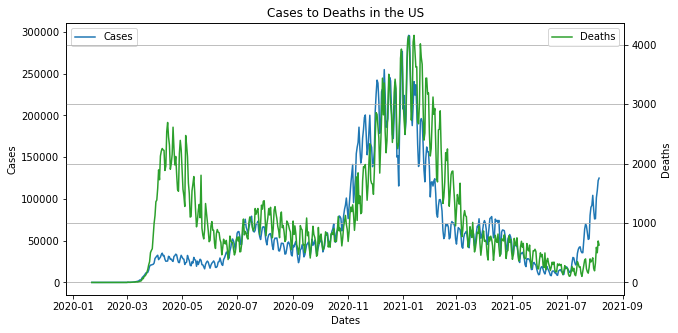

In [20]:
fig, ax = plt.subplots(figsize = (10, 5))
ax2 = ax.twinx()
ax.plot(cases_deaths.index, cases_deaths['Cases'], c = 'C0', label = 'Cases')
ax2.plot(cases_deaths.index, cases_deaths['Deaths'], c = 'C2', label = 'Deaths')
ax2.legend(loc = 1)
ax.legend(loc = 2)
plt.title('Cases to Deaths in the US')
ax.set_xlabel('Dates')
ax2.set_ylabel('Deaths')
ax.set_ylabel('Cases')
ax2.grid()
plt.savefig('Cases and Deaths US', dpi = 500)
plt.show()

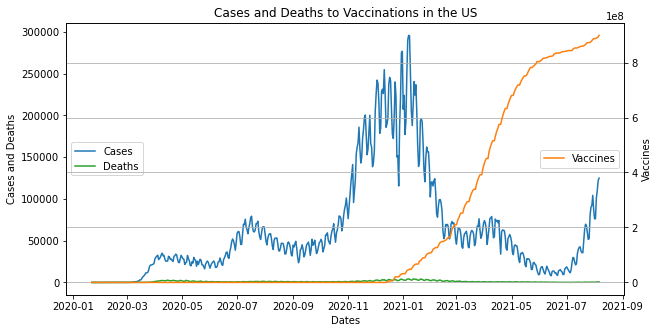

In [21]:
fig, ax = plt.subplots(figsize = (10, 5))
ax2 = ax.twinx()
ax.plot(vaccinations.index, cases_deaths['Cases'], c = 'C0', label = 'Cases')
ax.plot(vaccinations.index, cases_deaths['Deaths'], c = 'C2', label = 'Deaths')
ax2.plot(vaccinations.index, vaccinations['Vaccines'], c = 'C1', label = 'Vaccines')
ax2.legend(loc = 7)
ax.legend(loc = 6)
plt.title('Cases and Deaths to Vaccinations in the US')
ax.set_xlabel('Dates')
ax2.set_ylabel('Vaccines')
ax.set_ylabel('Cases and Deaths')
ax2.grid()
plt.savefig('Cases, Deaths and Vaccination US', dpi = 500)
plt.show()

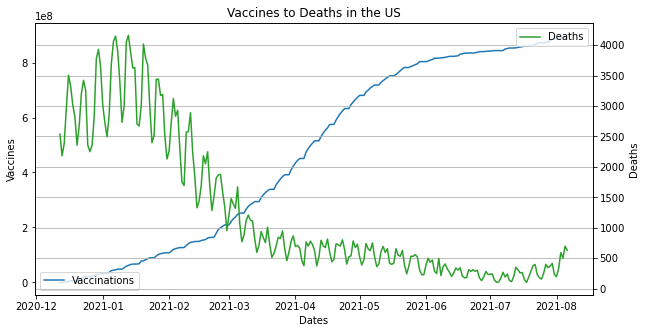

In [22]:
fig, ax = plt.subplots(figsize = (10, 5))
ax2 = ax.twinx()
ax.plot(vaccinations.index.values[325:], vaccinations.iloc[325:, 0], c = 'C0', label = 'Vaccinations')
ax2.plot(vaccinations.index.values[325:], cases_deaths.iloc[325:, 1], c = 'C2', label = 'Deaths')
ax2.legend(loc = 1)
ax.legend(loc = 3)
plt.title('Vaccines to Deaths in the US')
ax.set_xlabel('Dates')
ax2.set_ylabel('Deaths')
ax.set_ylabel('Vaccines')
ax2.grid()
plt.savefig('Vaccines and Deaths US', dpi = 500)
plt.show()

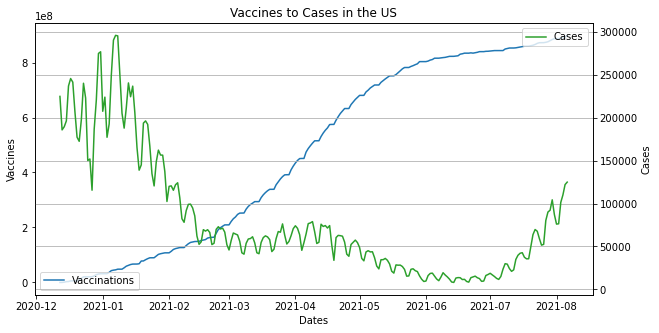

In [23]:
fig, ax = plt.subplots(figsize = (10, 5))
ax2 = ax.twinx()
ax.plot(vaccinations.index.values[325:], vaccinations.iloc[325:, 0], c = 'C0', label = 'Vaccinations')
ax2.plot(vaccinations.index.values[325:], cases_deaths.iloc[325:, 0], c = 'C2', label = 'Cases')
ax2.legend(loc = 1)
ax.legend(loc = 3)
plt.title('Vaccines to Cases in the US')
ax.set_xlabel('Dates')
ax2.set_ylabel('Cases')
ax.set_ylabel('Vaccines')
ax2.grid()
plt.savefig('Vaccines and Cases US', dpi = 500)
plt.show()

In [24]:
from scipy.stats import pearsonr

In [25]:
corr1, _ = pearsonr(vaccinations.iloc[325:, 0], cases_deaths.iloc[325:, 0])
print(corr1)

-0.7553998440027808


In [26]:
corr2, _ = pearsonr(vaccinations.iloc[325:, 0], cases_deaths.iloc[325:, 1])
print(corr2)

-0.8713863560532837


In [27]:
corr3, _ = pearsonr(cases_deaths.iloc[:, 0], cases_deaths.iloc[:, 1])
print(corr3)

0.8000372362103491
